In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('Solar Dataset_Solar from MEDA-1.XLSX', sheet_name='Non_gap_filled_10min_data')

In [ ]:
df.head(5)


,#date time,el,az,ghi,ghi_flag,dni,dni_flag,dhi,dhi_flag,ws,...,rh,rh_flag,press,press_flag,precip,precip_flag,dp,dp_flag,wb,wb_flag
0,2019-06-18 00:00:00,-45.2,353.6,0,10004,0,10004,00:00:00,10004,1.5,...,47,10000,967,10000,0,10000,20.3,10000,24.2,10000
1,2019-06-18 00:10:00,-45.4,356.8,0,10004,0,10004,00:00:00,10004,1.5,...,47,10000,967,10000,0,10000,20.4,10000,24.2,10000
2,2019-06-18 00:20:00,-45.5,180.1,0,10004,0,10004,00:00:00,10004,2.2,...,48,10000,967,10000,0,10000,20.6,10000,24.3,10000
3,2019-06-18 00:30:00,-45.4,3.4,0,10004,0,10004,00:00:00,10004,1.9,...,49,10000,967,10000,0,10000,20.7,10000,24.3,10000
4,2019-06-18 00:40:00,-45.2,6.6,0,10004,0,10004,00:00:00,10004,1.4,...,49,10000,967,10000,0,10000,20.8,10000,24.4,10000


In [ ]:
df.drop(columns=['ghi_flag', 'dni_flag','dhi_flag','rh_flag','press_flag', 'precip_flag','dp_flag','wb_flag','ws_flag','maxws_flag','wd_flag','airtemp_flag','ghi'],inplace=True)


In [ ]:
df.dropna(inplace=True)
df.replace(' NaN',0,inplace=True)

In [ ]:
df.isnull().sum()

#date time    0
el            0
az            0
dni           0
dhi           0
ws            0
maxws         0
wd            0
airtemp       0
rh            0
press         0
precip        0
dp            0
wb            0
dtype: int64

In [ ]:
df.head(5)

,#date time,el,az,dni,dhi,ws,maxws,wd,airtemp,rh,press,precip,dp,wb
0,2019-06-18 00:00:00,-45.2,353.6,0,00:00:00,1.5,3.5,200,32.9,47,967,0.0,20.3,24.2
1,2019-06-18 00:10:00,-45.4,356.8,0,00:00:00,1.5,3.3,196,32.8,47,967,0.0,20.4,24.2
2,2019-06-18 00:20:00,-45.5,180.1,0,00:00:00,2.2,4.4,194,32.6,48,967,0.0,20.6,24.3
3,2019-06-18 00:30:00,-45.4,3.4,0,00:00:00,1.9,5.3,202,32.6,49,967,0.0,20.7,24.3
4,2019-06-18 00:40:00,-45.2,6.6,0,00:00:00,1.4,2.8,203,32.6,49,967,0.0,20.8,24.4


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52772 entries, 0 to 52771
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   #date time  52772 non-null  datetime64[ns]
 1   el          52772 non-null  float64       
 2   az          52772 non-null  float64       
 3   dni         52772 non-null  int64         
 4   dhi         52772 non-null  object        
 5   ws          52772 non-null  float64       
 6   maxws       52772 non-null  float64       
 7   wd          52772 non-null  int64         
 8   airtemp     52772 non-null  float64       
 9   rh          52772 non-null  int64         
 10  press       52772 non-null  int64         
 11  precip      52772 non-null  float64       
 12  dp          52772 non-null  float64       
 13  wb          52772 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(4), object(1)
memory usage: 5.6+ MB


In [ ]:
#df['ghi'] = df['ghi'].astype(float)
df['dni'] = df['dni'].astype(float)
#df['dhi'] = df['dhi'].astype(float)
df['ws'] = df['ws'].astype(float)
df['maxws'] = df['maxws'].astype(float)
df['wd'] = df['wd'].astype(float)
df['airtemp'] = df['airtemp'].astype(float)
df['rh'] = df['rh'].astype(float)
df['press'] = df['press'].astype(float)
df['precip'] = df['precip'].astype(float)
df['dp'] = df['dp'].astype(float)
df['wb'] = df['wb'].astype(float)


In [ ]:
df.drop(columns=['dhi'],inplace=True)

In [ ]:
df.head(5)

,#date time,el,az,dni,ws,maxws,wd,airtemp,rh,press,precip,dp,wb
0,2019-06-18 00:00:00,-45.2,353.6,0.0,1.5,3.5,200.0,32.9,47.0,967.0,0.0,20.3,24.2
1,2019-06-18 00:10:00,-45.4,356.8,0.0,1.5,3.3,196.0,32.8,47.0,967.0,0.0,20.4,24.2
2,2019-06-18 00:20:00,-45.5,180.1,0.0,2.2,4.4,194.0,32.6,48.0,967.0,0.0,20.6,24.3
3,2019-06-18 00:30:00,-45.4,3.4,0.0,1.9,5.3,202.0,32.6,49.0,967.0,0.0,20.7,24.3
4,2019-06-18 00:40:00,-45.2,6.6,0.0,1.4,2.8,203.0,32.6,49.0,967.0,0.0,20.8,24.4


In [ ]:
corr = df.corr(method = 'spearman')

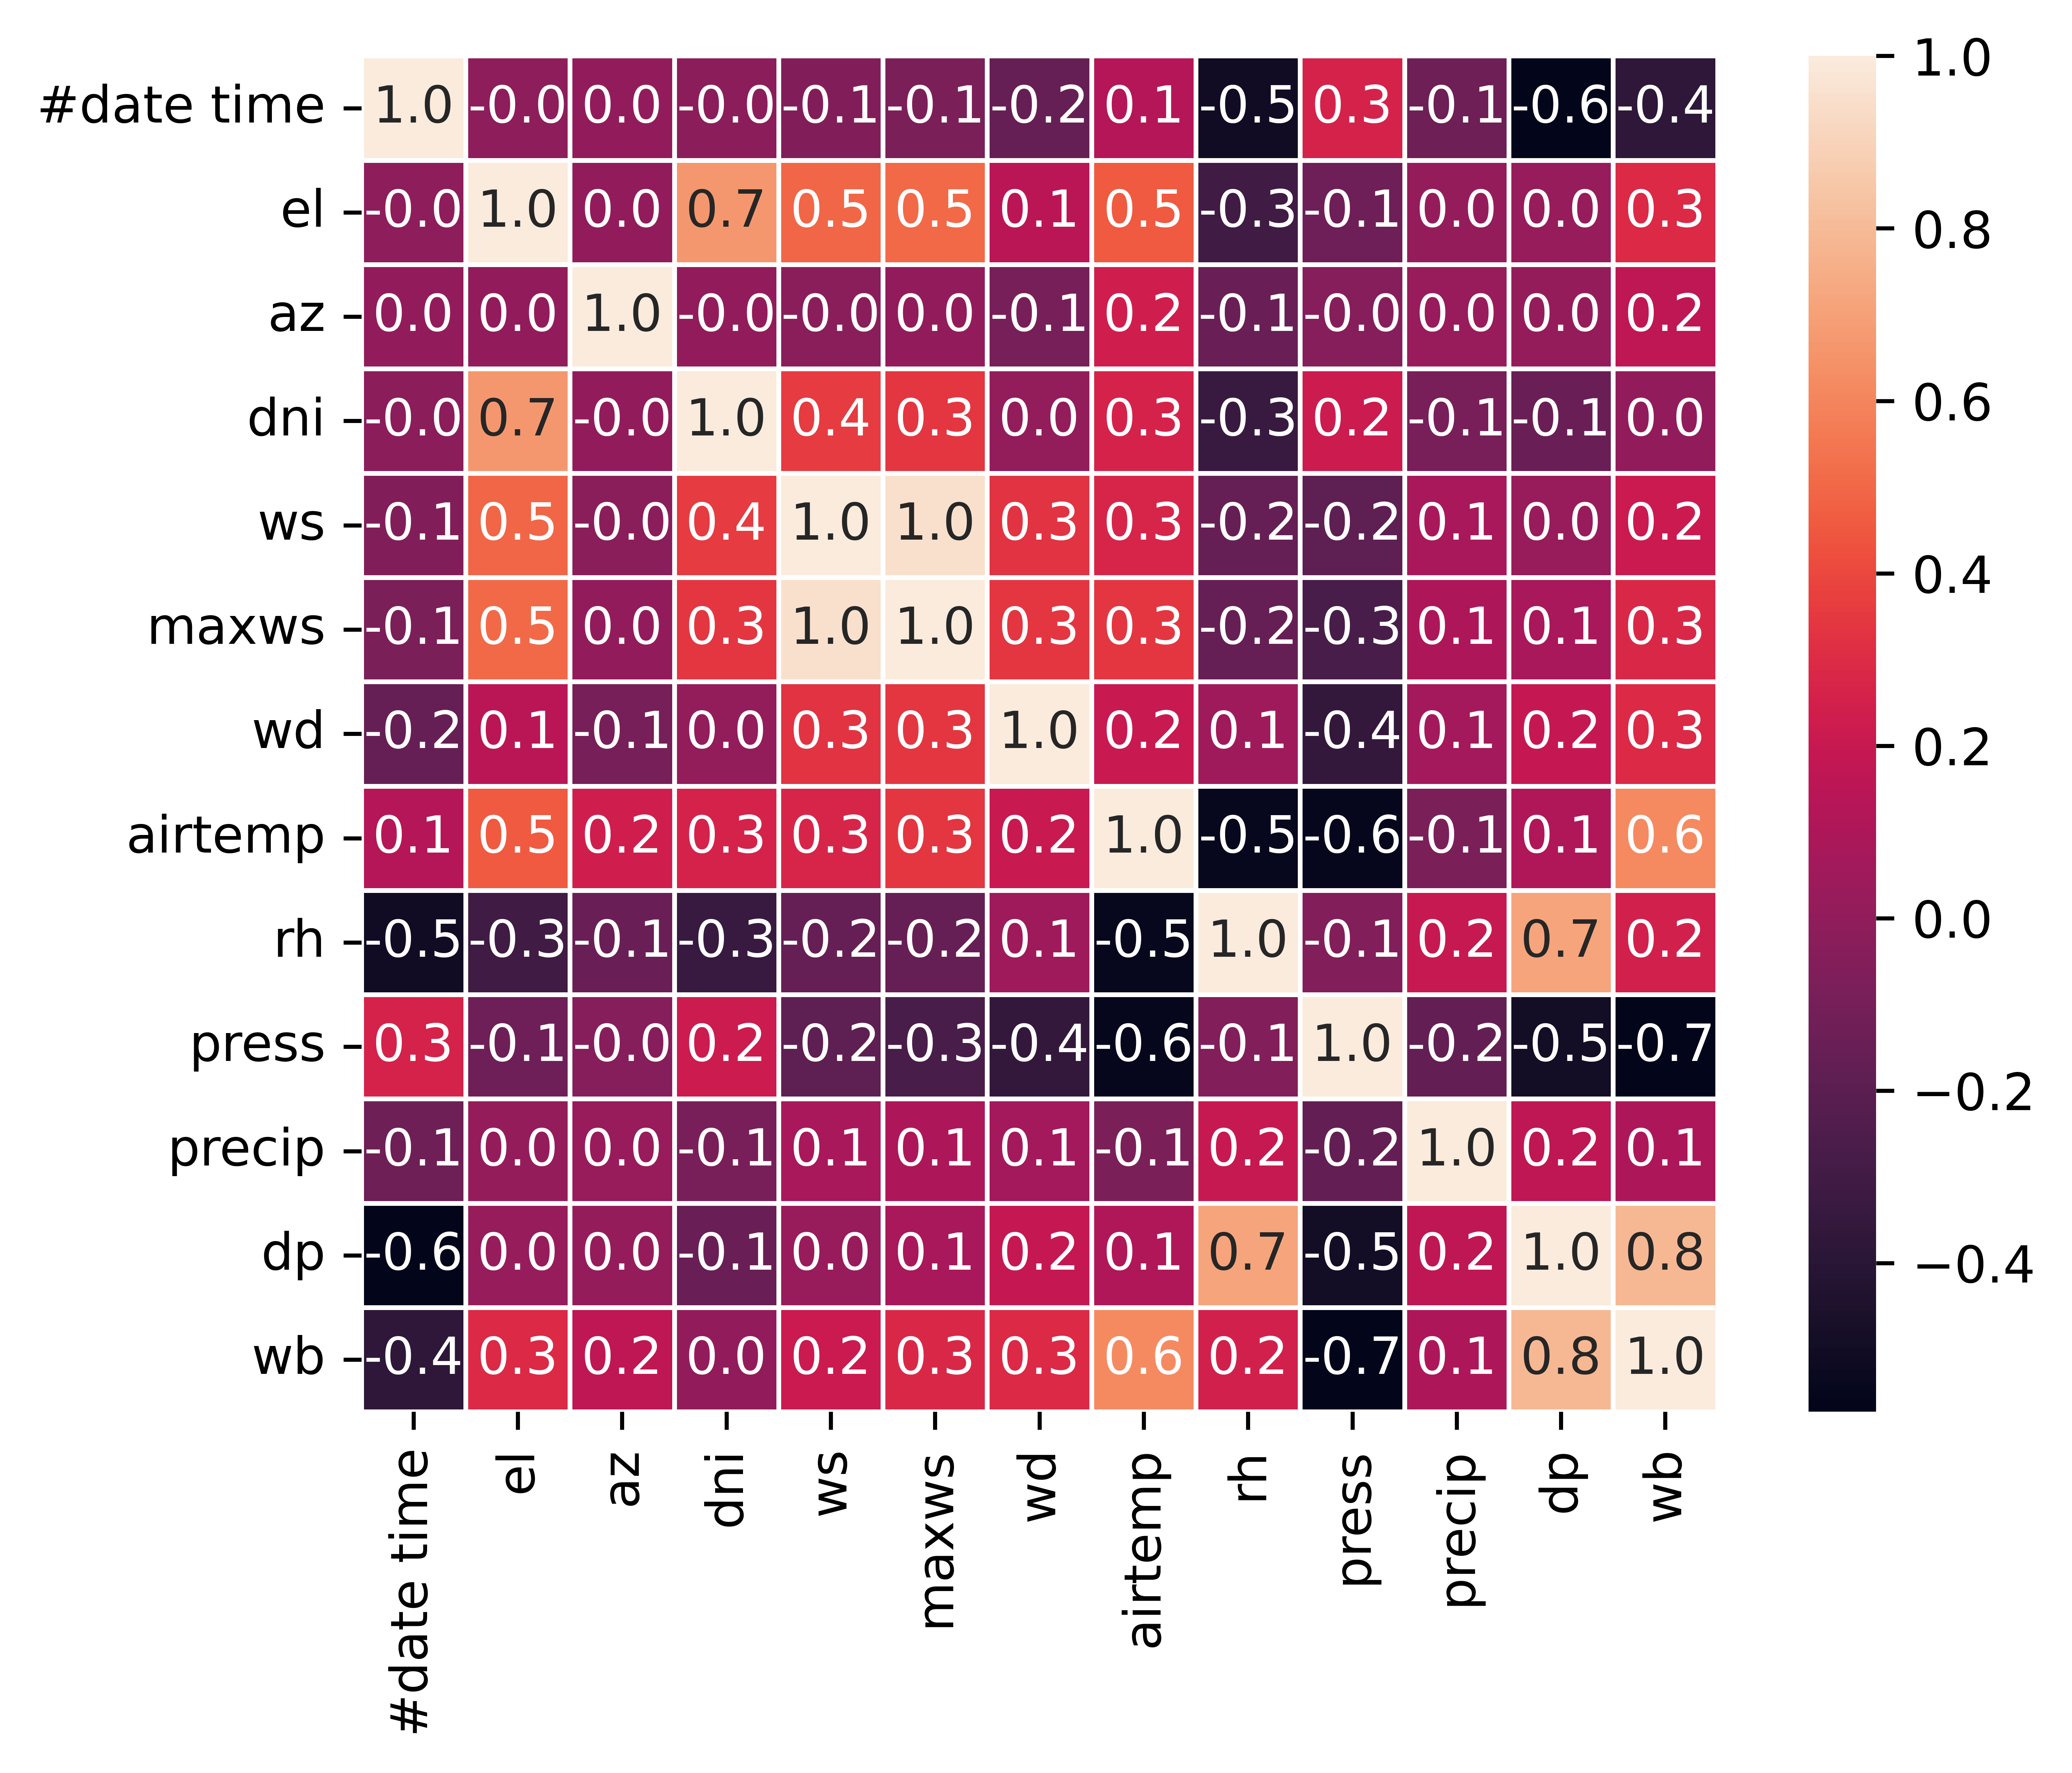

In [ ]:
plt.figure(dpi=1000)
sns.heatmap(corr, robust=True, annot=True, fmt='0.1f', linewidths=.9, square=True)
plt.show()

In [ ]:
df['#date time']= pd.to_datetime(df['#date time'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.head(2)

,#date time,el,az,dni,ws,maxws,wd,airtemp,rh,press,precip,dp,wb
0,2019-06-18 00:00:00,-45.2,353.6,0.0,1.5,3.5,200.0,32.9,47.0,967.0,0.0,20.3,24.2
1,2019-06-18 00:10:00,-45.4,356.8,0.0,1.5,3.3,196.0,32.8,47.0,967.0,0.0,20.4,24.2


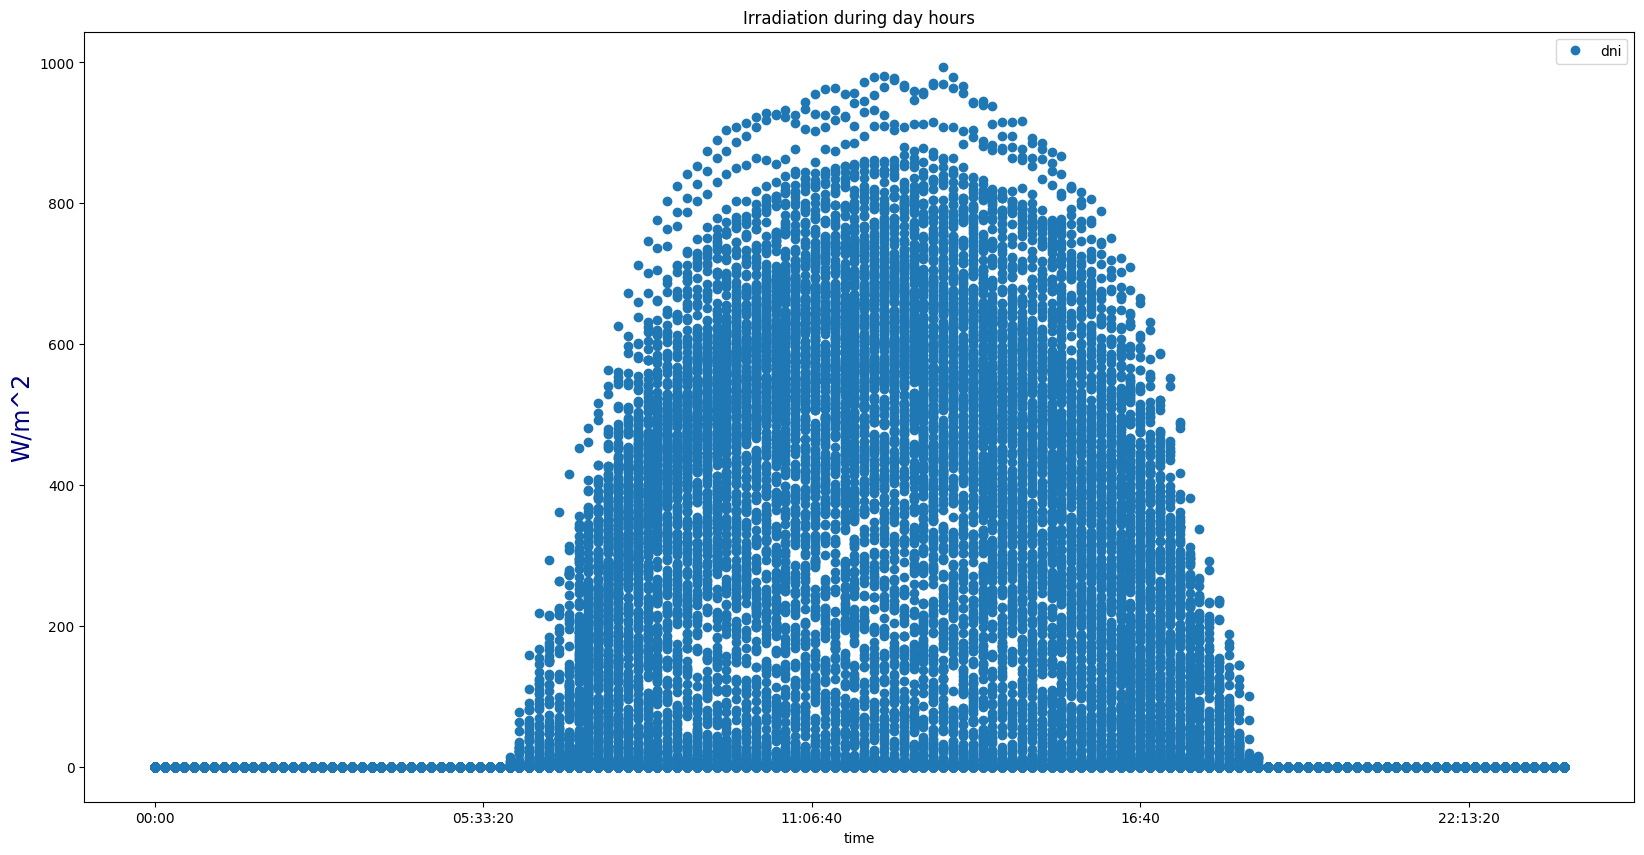

In [ ]:
df_sens=df.groupby('#date time').sum().reset_index()
df_sens['time']=df['#date time'].dt.time

fig,ax = plt.subplots(ncols=1,nrows=1,dpi=100,figsize=(20,10))
# daily yield plot
df_sens.plot(x='time',y='dni',ax=ax,style='o')

ax.set_title('Irradiation during day hours',)

ax.set_ylabel('W/m^2',color='navy',fontsize=17)



plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['el', 'az', 'wb', 'precip', 'press', 'dp', 'rh', 'airtemp', 'ws', 'maxws']]
#y =df['dni']
max_y = df['dni'].max()
y = df['dni']/max_y

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
y

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
52767    0.225352
52768    0.100604
52769    0.009054
52770    0.238431
52771    0.315895
Name: dni, Length: 52772, dtype: float64

# DNN MODEL

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df, X, and y are defined as in your original code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1/50
1056/1056 [==============================] - 4s 3ms/step - loss: 0.0179 - root_mean_squared_error: 0.1339 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1121
Epoch 2/50
1056/1056 [==============================] - 3s 3ms/step - loss: 0.0124 - root_mean_squared_error: 0.1113 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1083
Epoch 3/50
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0117 - root_mean_squared_error: 0.1083 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1047
Epoch 4/50
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1056
Epoch 5/50
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0106 - root_mean_squared_error: 0.1028 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1051
Epoch 6/50
1056/1056 [==============================] - 3s 3ms/step - loss: 0.0102 - root_mean_squared_error: 0.1012 - val_loss: 0

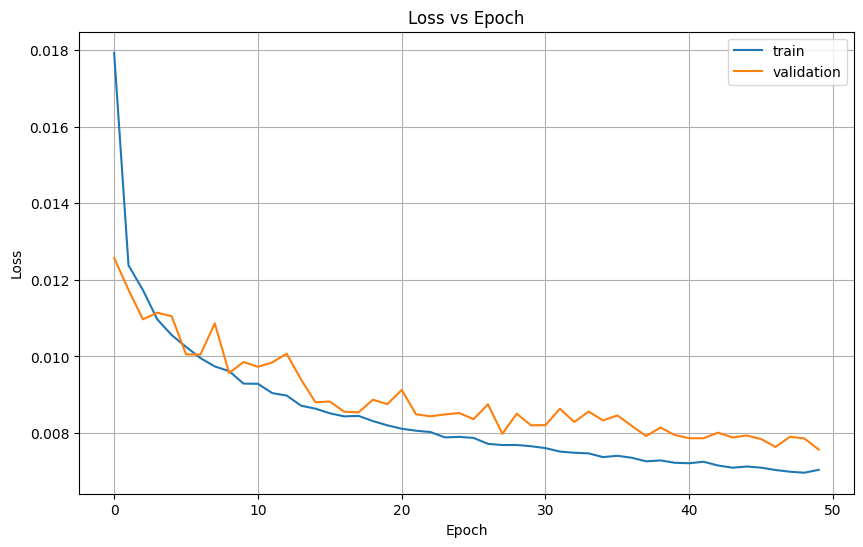

In [ ]:
# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear' )  # Output layer with one neuron for regression
])

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.002), metrics=[RootMeanSquaredError()])

# Train the model
history =model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions1 = model.predict(X_test_scaled)*max_y

330/330 [==============================] - 1s 2ms/step


In [ ]:
# Predict DNI values using the trained model
import pandas as pd
y_pred = model.predict(X_test_scaled)

# Inverse transform the scaled DNI predictions to get the actual DNI values
y_pred_actual = y_pred * max_y
y_test_actual = y_test * max_y
y_pred_actual = y_pred_actual.flatten()
#y_test_actual = y_test_actual.flatten()
import pandas as pd

# Create a DataFrame to store predicted and actual DNI values
dni_comparison = pd.DataFrame({
    'Predicted DNI': y_pred_actual,
    'Actual DNI': y_test_actual
})

# Print the DataFrame
dni_comparison.head(15)

330/330 [==============================] - 1s 4ms/step
       Predicted DNI  Actual DNI
33175     551.535034         0.0
12176      24.904673        52.0
52536      -0.019076         0.0
32364      -0.019076         0.0
8528       -0.019076         0.0
...              ...         ...
3924       -0.019076         0.0
23986     400.514557       289.0
48513      -0.019076         0.0
25381      -0.019076         0.0
11283      -0.019076         0.0

[10555 rows x 2 columns]


In [ ]:
dni_comparison.head(15)

,Predicted DNI,Actual DNI
33175,551.535034,0.0
12176,24.904673,52.0
52536,-0.019076,0.0
32364,-0.019076,0.0
8528,-0.019076,0.0
11355,-0.019076,0.0
12350,-0.019076,0.0
6929,-0.019076,0.0
3416,62.782642,0.0
28911,-0.019076,0.0


NameError: name 'X_test_scaled2' is not defined

GHI PRediction form Predicted DNI

In [ ]:
df = pd.read_excel('Solar Dataset_Solar from MEDA-1.XLSX', sheet_name='Non_gap_filled_10min_data')
df.dropna(inplace=True)
df.replace(' NaN',0,inplace=True)
df.isnull().sum()

#date time      0
el              0
az              0
ghi             0
ghi_flag        0
dni             0
dni_flag        0
dhi             0
dhi_flag        0
ws              0
ws_flag         0
maxws           0
maxws_flag      0
wd              0
wd_flag         0
airtemp         0
airtemp_flag    0
rh              0
rh_flag         0
press           0
press_flag      0
precip          0
precip_flag     0
dp              0
dp_flag         0
wb              0
wb_flag         0
dtype: int64

In [ ]:
df['ghi'] = df['ghi'].astype(float)
df['dni'] = df['dni'].astype(float)
#df['dhi'] = df['dhi'].astype(float)
df['ws'] = df['ws'].astype(float)
df['maxws'] = df['maxws'].astype(float)
df['wd'] = df['wd'].astype(float)
df['airtemp'] = df['airtemp'].astype(float)
df['rh'] = df['rh'].astype(float)
df['press'] = df['press'].astype(float)
df['precip'] = df['precip'].astype(float)
df['dp'] = df['dp'].astype(float)
df['wb'] = df['wb'].astype(float)

In [ ]:
X2 = df[['el', 'az', 'wb', 'precip', 'press', 'dp', 'rh', 'airtemp', 'ws', 'maxws','dni']]
X3 = df[['el', 'az', 'wb', 'precip', 'press', 'dp', 'rh', 'airtemp', 'ws', 'maxws']]
#y =df['dni']
max_y2 = df['ghi'].max()
y2 = df['ghi']/max_y2

In [ ]:
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

In [ ]:
X2['dni'] = model.predict(X3)

1650/1650 [==============================] - 2s 1ms/step


<ipython-input-124-aeef2829583c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['dni'] = model.predict(X3)


Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1/50
1056/1056 [==============================] - 4s 3ms/step - loss: 0.0082 - root_mean_squared_error: 0.0905 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 2/50
1056/1056 [==============================] - 3s 3ms/step - loss: 0.0041 - root_mean_squared_error: 0.0644 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0830
Epoch 3/50
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0040 - root_mean_squared_error: 0.0629 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0612
Epoch 4/50
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0037 - root_mean_squared_error: 0.0607 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 5/50
1056/1056 [==============================] - 3s 2ms/step - loss: 0.0036 - root_mean_squared_error: 0.0600 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0586
Epoch 6/50
1056/1056 [==============================] - 3s 3ms/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0

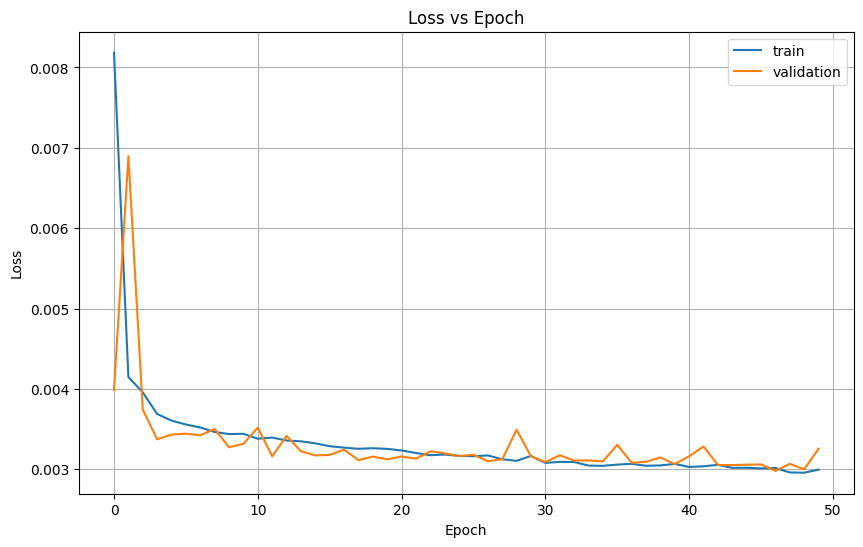

In [ ]:
# Build the neural network model for predicting ghi
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear' )  # Output layer with one neuron for regression
])

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.002), metrics=[RootMeanSquaredError()])

# Train the model
history =model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

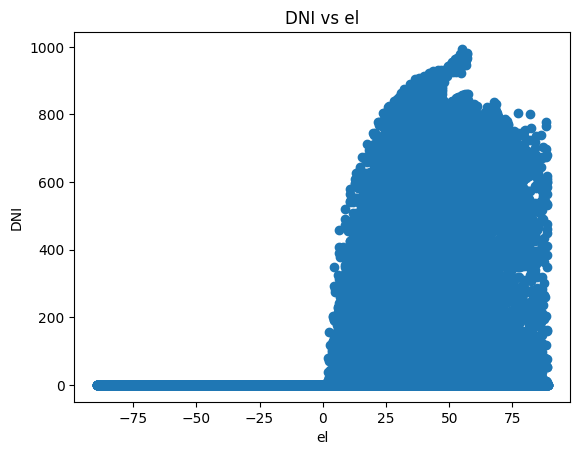

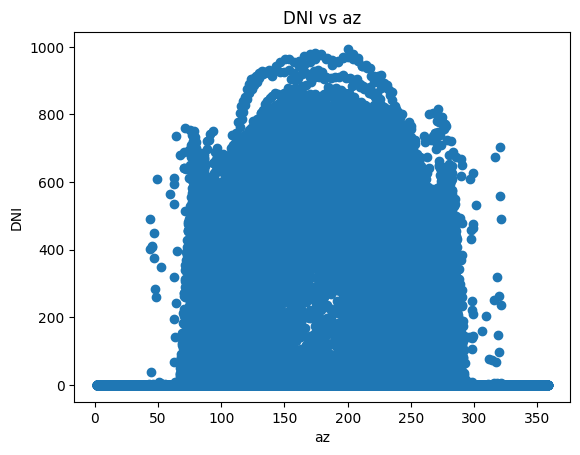

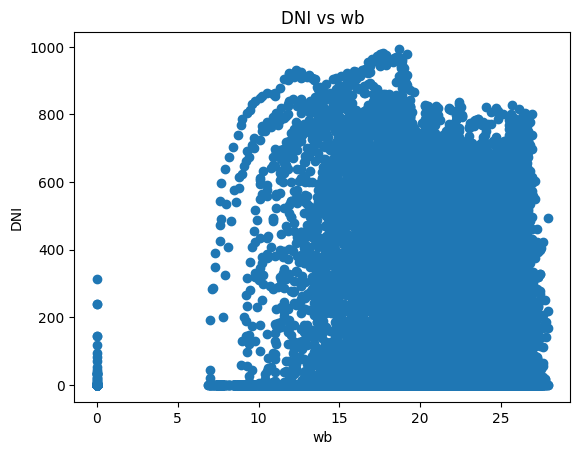

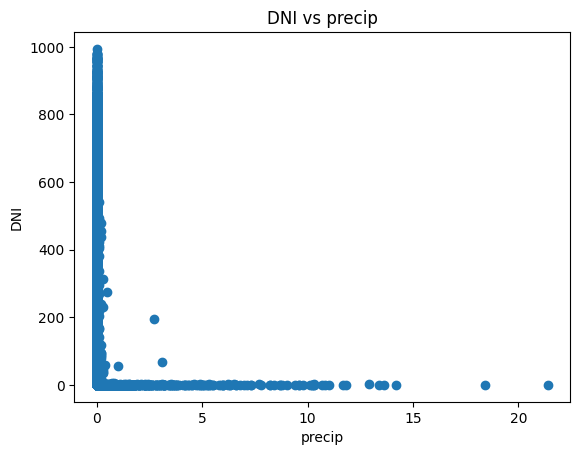

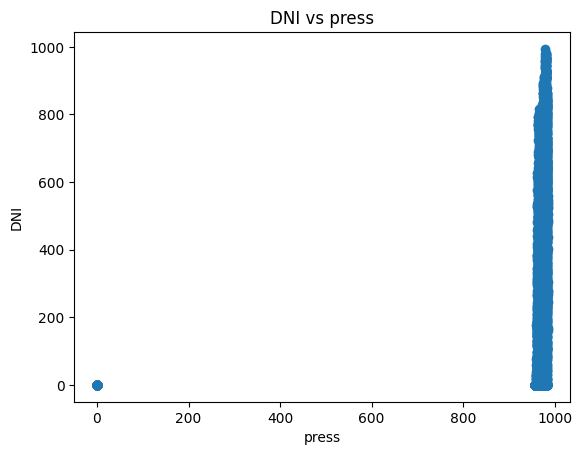

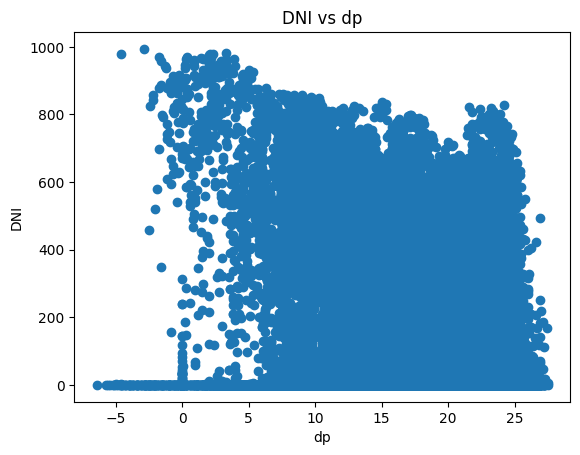

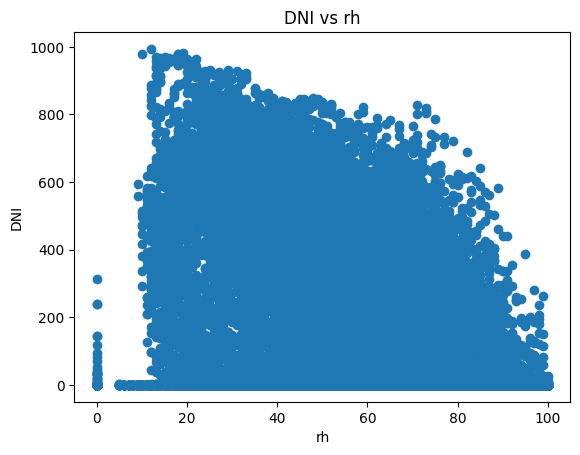

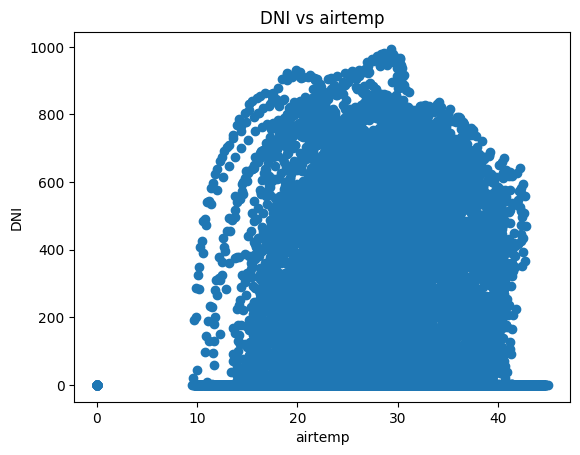

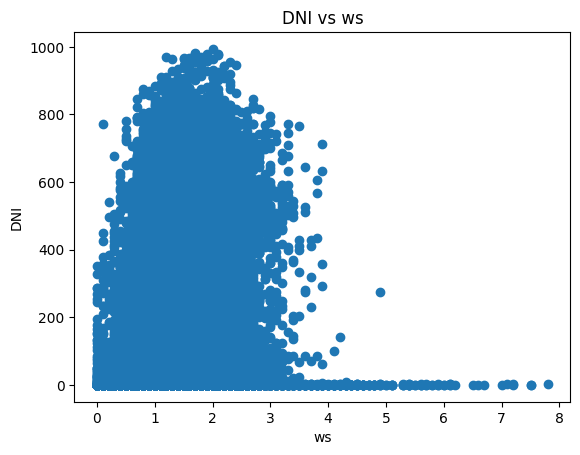

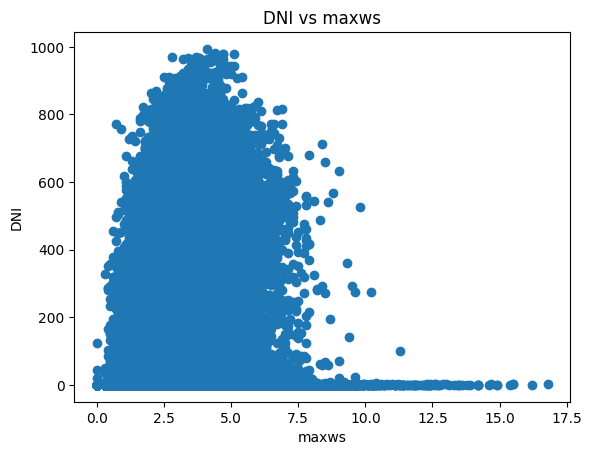

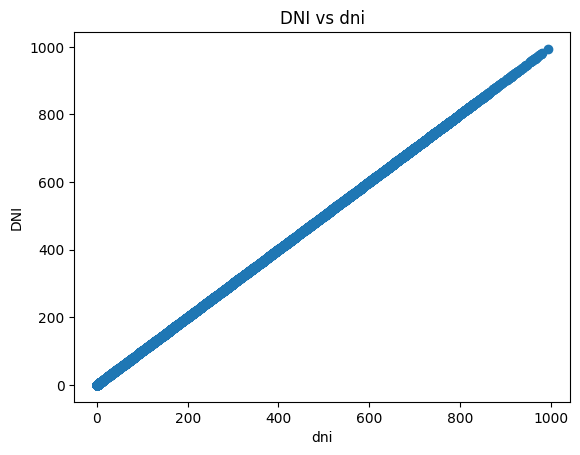

In [ ]:
import matplotlib.pyplot as plt

# Plot the 'dni' values against each feature
for feature in X2.columns:
  plt.figure()
  plt.scatter(df[feature], df['dni'])
  plt.xlabel(feature)
  plt.ylabel('DNI')
  plt.title(f'DNI vs {feature}')
  plt.show()
